Submission Deadline: __November 20, 2023; 11:59 PM__

A penalty will be applied for late submission. Please refer to the course policy for more detail.  

## Instructions

Please read the instructions carefully before you start working on the homework.

- Please follow instructions and printed out the results as required. Keep the printed results and your implementation for grading purpose.
    - The TAs will not run your code for grading purpose unless it is necessary. That means, you may lose some points if the printed results are not in the submitted file.
- Submission should be via Canvas.
    - If you use Google Colab for running the code, please download the file and submit it via Canvas once it's done.
    - Submission via a Google Colab link will be considered as an invalid submission.
- Please double check the submitted file once you upload it to Canvas.
    - Students should be responsible for checking whether they submit the right files.
    - Re-submission is not allowed once the deadline is passed.

Also, if you missed the class lectures, please study the course materials first before working on the homework. It may save you some time.

# Homework 03 Language Modeling

In [ ]:
! pip install livelossplot --quiet
! pip install tokenizers
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00


In [ ]:
from typing import List, Tuple, Callable
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from nltk.util import ngrams
from nltk.lm import MLE
from nltk.tokenize import word_tokenize
import string as string
from nltk.util import ngrams
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task: Language Modeling

Language modeling is a task in natural language processing where the goal is to predict the next word in a sequence of words. Given a sequence of words as input, the model predicts the probability distribution over the vocabulary for the next word. The output is a label representing the most likely next word.

For instance, if the input sequence is "the quick brown fox", the model will predict the probability distribution over the vocabulary for the next word, which could be "jumped", "ran", or any other word in the language.

In this assignment, we will perform language modeling using the [WikiText dataset](https://blog.salesforceairesearch.com/the-wikitext-long-term-dependency-language-modeling-dataset/), which contains a large collection of text from Wikipedia articles. The task involves training models to generate coherent and contextually appropriate text, making it a fundamental problem in natural language processing.


# 1: N-Gram Language Modeling:  

In the context of n-grams, language modeling involes estimating the likelihood of a sequence of words/tokens based on the history of preceding words.


The goal of this portion of the assignment is to implement n-gram language models for values of $n \in [ 2, 4, 8]$, generate sample text, and calculate the perplexity of each n-gram model on the train set.

In [ ]:
# Download the data
!rm -rf wiki wiki.zip
import urllib.request
url = "https://yangfengji.net/uva-nlp-grad/data/wiki.zip"
filename, headers = urllib.request.urlretrieve(url, filename="wiki.zip")
!unzip wiki.zip
print("Done")

Archive:  wiki.zip
   creating: wiki/
  inflating: wiki/dev-wiki.txt       
  inflating: wiki/test-wiki.txt      
  inflating: wiki/trn-wiki.txt       
Done


## 1.1 Data Preprocessing : (2 points)

###### Complete the following code block to create the tokenizer necessary for the proceeeding experiments

- Create the train tokenizer with the following properties
    - Add a special **\<unk\>** token to replace any OOV tokens
    - Replace numeric tokens with the **\<num\>** token
    - Remove punctuation and symbols
    - Ensure the tokenizer prepends a **\<bos\>** and appends an **\<eos\>** token to every sequence
    
- Train the tokenizer on the train set of Wiki-Text

Please

- Print the vocabulary size of the tokenizer, using a necessary description of the printed result
- **N.B.** You may want to make use of the [huggingface tokenizer docs.](https://huggingface.co/docs/tokenizers/components)

In [ ]:
from tokenizers import Tokenizer, processors,normalizers
from tokenizers import pre_tokenizers
from tokenizers.pre_tokenizers import WhitespaceSplit
from tokenizers import Tokenizer
from tokenizers import  trainers
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.processors import TemplateProcessing
import re

In [ ]:
from tokenizers import Regex



In [ ]:


# define the tokenizer with the help of the huggingface docs:
# https://huggingface.co/docs/tokenizers/index
#-> tokenizers.Tokenizer
def train_tokenizer(fname: str) :
    """
    Args:
        fname: the name of the wiki.txt file

    Returns: Huggingface Tokenizer
    """
    pattern = r'-?\d+(\.\d+)?'
    pattern=Regex(pattern)
    PAD_TOKEN = '<pad>'
    UNK_TOKEN = '<unk>'
    NUM_TOKEN = '<num>'
    START_TOKEN= '<bos>'
    END_TOKEN= '<eos>'
    tokenizer = Tokenizer(WordLevel(unk_token=UNK_TOKEN))
    tokenizer.normalizer = normalizers.Sequence(
    [normalizers.Lowercase(),normalizers.Replace(pattern,NUM_TOKEN)])
#)
    tokenizer.pre_tokenizer = pre_tokenizers.Sequence([

        pre_tokenizers.Punctuation(behavior='removed'),  # Remove punctuation and symbols
        pre_tokenizers.Whitespace()  # Split based on whitespace
    ])

    trainer = trainers.WordLevelTrainer(
        special_tokens=[PAD_TOKEN, UNK_TOKEN, NUM_TOKEN, START_TOKEN, END_TOKEN],
        unk_token=UNK_TOKEN

    )




    files = [fname]
    tokenizer.train(files, trainer)

    tokenizer.post_processor = processors.TemplateProcessing(
    single=f"<bos> $A <eos>",
    special_tokens=[
        (PAD_TOKEN, 0),
        (UNK_TOKEN, 1),
        (NUM_TOKEN, 2),
        (START_TOKEN, 3),
        (END_TOKEN, 4),
    ],
    )




    # =============================
    # TODO:
    return tokenizer

In [ ]:
# =============================
# TODO: Train the tokenizer
tokenizer = train_tokenizer("/content/wiki/trn-wiki.txt")

In [ ]:
# =============================
# TODO: Print the Vocab size
vocab_size = tokenizer.get_vocab_size()

print(f"Vocabulary size: {vocab_size}")


Vocabulary size: 27352


In [ ]:
from tokenizers import Tokenizer
def sanity_check(tokenizer: Tokenizer,
                sample_text: str):
    """
    Args:

    """



    try:
        tokens = tokenizer.encode(sample_text).tokens
        assert tokens[0] == '<bos>'
        assert tokens[-1] == '<eos>'
        assert all(token.islower() for token in tokens)
        assert len(tokens) == len(sample_text.split(' ')) + 2

        print('Sanity Check Passed')
        print(tokens)
    except AssertionError as e:
        print('Tokenizer failed sanity check')
        print(tokens)
    return

In [ ]:
sample_text='The quick Brown fox Jumped over the lazy dog'
sanity_check(tokenizer, sample_text)

Sanity Check Passed
['<bos>', 'the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', '<eos>']


# 1.2 Train the N-Gram Model : (2 pts)  

If the tokenizer passed the basic sanity check then proceed.

**TODO**
 - Train n-gram models for $n \in \{ 2, 4, 6, 8, 10\}$
 - Complete the get_ngrams function below, to return a list of all the n-grams
     - Each entry in this list represents all the n-grams for a given sentence
 - For each n-gram model, fit the model to it respective set of n-grams

In [ ]:
import tokenizers
"""
    Args:
        fname:

    Returns:
        all_ngrams: list of all n-grams
        or all sentences
    """


def get_ngrams(fname: str,
                  tokenizer: tokenizers.Tokenizer,
                    n: int) -> List[str]:

    all_ngrams = []

    with open(fname, 'r') as file:
      sentences = file.readlines()

    print(len(sentences))
    for sentence in sentences:
      tokenized_sentence = tokenizer.encode(sentence).tokens
      given_ngrams = ngrams(tokenized_sentence,n)

      sentence_ngrams = list(given_ngrams)

      all_ngrams.append(sentence_ngrams)

    print("finished n_grams creation")
    return all_ngrams

In [ ]:
# =============================
# TODO: Train the n-gram models

def trainNgram(fname,n,tokenizer):
    train_data=get_ngrams(fname, tokenizer, n)
    #print('hoise',train_data)
    lm=MLE(n)
    lm.fit(train_data,tokenizer.get_vocab())
    return lm,train_data

#vocab_size = tokenizer.get_vocab_size()

#print(f"Vocabulary size: {vocab_size}")
#fname="/content/wiki/new.txt"
#lm=trainNgram(fname, 2,tokenizer)

# 1.3  Compute N-Gram Perplexity  (2 pts)

### Perplexity is a measure of how well a given distribution predicts a sample. In the context of language modeling, the perplexity is based on how well the model predicts a given corpus. The formula for computing perplexity-per-word of an n-gram model is given by:  

$$\text{PPW} = 2^{\frac{1}{W} \sum_{i=1}^{N} H(p, q)}$$

where: $$ H(p, q) = -\sum_{x} p(x) log(q()) $$

$H(p,q)$ may be interpreted as the cross-entropy between the distributions. However, for the n-gram model, nltk provides a [function which computes the perplexity](https://www.nltk.org/api/nltk.lm.api.html#nltk.lm.api.LanguageModel.perplexity).

**TODO**
- $\text{For n} \in \{2, 4, 6, 8 ,1 0\}$, compute the perplexity of each n-gram model on the train set
- You will need the $\texttt{get_ngrams}$ function in your $\texttt{ngram_perplexity}$ function

In [ ]:
def flatten_list(input_list):
    return [item for sublist in input_list for item in (flatten_list(sublist) if isinstance(sublist, list) else [sublist])]


In [ ]:
def ngram_perplexity(fname: str,
                     n:int,
                    tokenizer: tokenizers.Tokenizer,
                    ) -> float:
    """
    Arg:
    Returns:
    """


    lm,train_data=trainNgram(fname,n,tokenizer)
    #train_data=get_ngrams(fname, tokenizer, n)

    train_data=flatten_list(train_data)
    perplexity=lm.perplexity(train_data)

    return perplexity


In [ ]:
fname="/content/wiki/trn-wiki.txt"

p=ngram_perplexity(fname,2,tokenizer)
print(f"perplexity {p}")

111565
finished n_grams creation
perplexity 88.08907432851937


In [ ]:
#
fname="/content/wiki/trn-wiki.txt"
perplexities=[]
n=[2,4,6,8,10]
for _n in n:
  p=ngram_perplexity(fname,_n,tokenizer)
  perplexities.append(p)


print(f"perplexity list: {perplexities}")
# =============================
# TODO: compute the perplexity for varying values of n

111565
finished n_grams creation
111565
finished n_grams creation
111565
finished n_grams creation
111565
finished n_grams creation
111565
finished n_grams creation
perplexity list: [88.08907432851937, 1.8528113108752913, 1.0516254872950843, 1.0076217047233984, 1.002317829498047]


# 1.4 Plot N-gram Size vs Perplexity : (2 pts)  

**TODO**:
 - $\text{For n} \in \{2, 4, 6, 8 ,1 0\}$ plot the N-Gram size vs Perplexity for each of the n-gram models

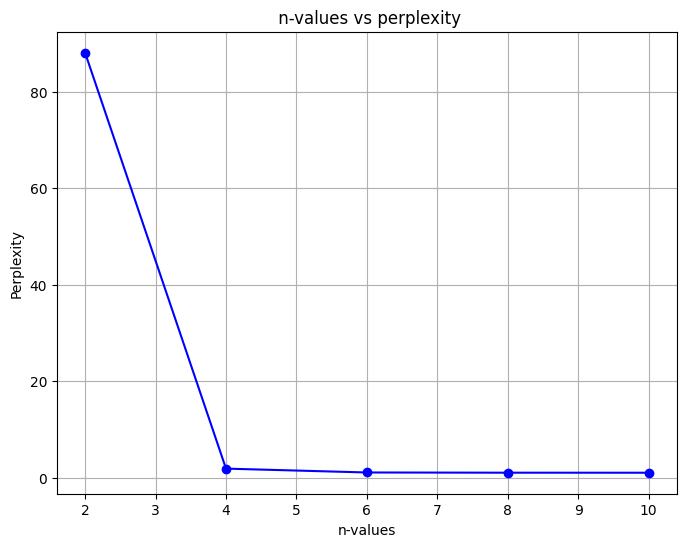

In [ ]:
# =============================
# TODO: create the plots

import matplotlib.pyplot as plt

# Given n-values and corresponding perplexity values
n_values = [2, 4, 6, 8, 10]
#### perplexity_values = [100, 80, 60, 40, 20]  # Replace these values with your actual perplexity values

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_values,perplexities, marker='o', linestyle='-', color='b')
plt.title(' n-values vs perplexity')
plt.ylabel('Perplexity')
plt.xlabel('n-values')
plt.grid(True)
plt.show()

# 1.4 Interpretation of N-gram Size vs Perplexity : (1 pt)  

**TODO**: In the Markdown cell below, explain the effect you observe, why do you think this is the case?

Here at the beginning when there is only one previous token, the perplexity is higher as it does not have enough context. With the increase of n value, the model is having more information about the context, as a result it could predict better. Surprisingly, just adding 2 extra previous tokens improves a lot for n=4 from n=2. However, after n=8 it does not improve much. It seems like it is converging somewhere between n=8 to n=10. In that case adding any more context will not improve much.

# Simple RNN LM

# 2.1 Train a Recurrent Neural Network on the Train Set of Wiki-Text
## Preprocessing (1pt)

**TODO**
- use the tokenizer to preprocess the text and create the necessary dataloaders
- enable padding for the tokenizer

In [ ]:
import torch
import torch.nn as nn
from livelossplot import PlotLosses


plotlosses = PlotLosses()

In [ ]:
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")
#device = torch.device("cpu")

CUDA is available. Using GPU.


In [ ]:
# =============================
# TODO: enable padding for tokenizer
tokenizer.enable_padding()

In [ ]:
#https://huggingface.co/docs/datasets/loading_datasets.html
from datasets import load_dataset
import torch.utils
dataset = load_dataset('text', data_files={'train': 'wiki/trn-wiki.txt', 'dev': 'wiki/dev-wiki.txt'})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating dev split: 0 examples [00:00, ? examples/s]

## 2.1.1 Dataloaders and Padding
**TODO**
- Create the train and dev_dataloaders

In [ ]:

def collate(examples: List[str]) -> torch.Tensor:
    """
    Args:
        examples
    """
    return torch.LongTensor([ex.ids for ex in tokenizer.encode_batch(examples)])

# =============================
# TODO: define dataloaders

train_dataloader = torch.utils.data.DataLoader(dataset["train"]["text"], batch_size=32, shuffle=True, collate_fn=collate)
valid_dataloader = torch.utils.data.DataLoader(dataset["dev"]["text"], batch_size=32, shuffle=False, collate_fn=collate)

iterator = iter(train_dataloader)
#print(next(iterator))
#for i in range(5):
#    print(next(iterator).shape)



## 2.1.2 RNN-Language Model Forward Pass
## Define the Language Model (2 pts)
**TODO**
- Implement the forward pass of the RNN

In [ ]:
#TODO: Implement the Forward Pass
import torch
import torch.nn as nn
import torch.nn.functional as F

class TokenRNN(nn.Module):
    def __init__(self,
                 vocab_size: int,
                 embedding_dim: int,
                 hidden_size: int,
                 output_size: int,
                 num_layers:int=1):
        """
        Args:

        """
        super(TokenRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True)
        self.out = nn.Linear(hidden_size, vocab_size)

    def forward(self,
                x: torch.Tensor) -> torch.Tensor:
        """
        Args:
            x: input sequence of tokens

        Returns:
            output: probability distribution over the vocab
                    for the next token at each time step
        """
        #print(x.device)
        embedded = self.embedding(x)  # Embedding layer
        output, _ = self.rnn(embedded)  # RNN layer
        out = self.out(output)
        #return F.log_softmax(out, dim=1)
        return F.log_softmax(out, dim=1),out
        # =============================
        # TODO:



In [ ]:
# =============================
# TODO: Declare instance of TokenRNN
# Define Hyperparameters
vocab_size = tokenizer.get_vocab_size()
embedding_dim = 32
hidden_size = 128
output_size = vocab_size  # Output size is typically the same as the vocabulary size
num_layers = 2
model = TokenRNN(vocab_size, embedding_dim, hidden_size, output_size, num_layers).to(device)



## 2.1.3 Train the Model (2 pt)

In [ ]:
# TODO:
import math
def train(model: nn.Module,
         dataloader: torch.utils.data.dataloader,
         criterion: nn.modules.loss,
         optimizer: torch.optim,
         device: torch.device,
         num_epochs: int) -> float:
    """
    Args:
        model:
        dataloader:
        criterion:
        optimizer:
        device:
        num_epochs:

    Return: final perplexity value after training

    """
    #model.train() #added by me
    #model.to(device) #added by me
    for epoch in range(1, num_epochs+1):
        logs = {}
        model.train()
        model.to(device)
        total_loss = 0

        for batch in dataloader:
          x,y = batch[:,:-1], batch[:,1:]
          #print("here: ",device)
          x=x.to(device)
          y=y.to(device)
          model.zero_grad()
          outProb,_=model(x)
          #print(outProb.shape,y.shape)
          outProb=outProb.view(-1, outProb.size(-1))
          loss = criterion(outProb, y.flatten())


          loss.backward()
          optimizer.step()

            # Accumulate total loss
          total_loss += loss.item()

          # =============================
          # TODO: Define training function




        logs['loss'] = total_loss/len(dataloader)
        logs['perplexity'] = math.exp(logs['loss'])
        plotlosses.update(logs)
        plotlosses.send()
    average_loss = total_loss / len(dataloader)
    final_perp = math.exp(average_loss)
    return final_perp

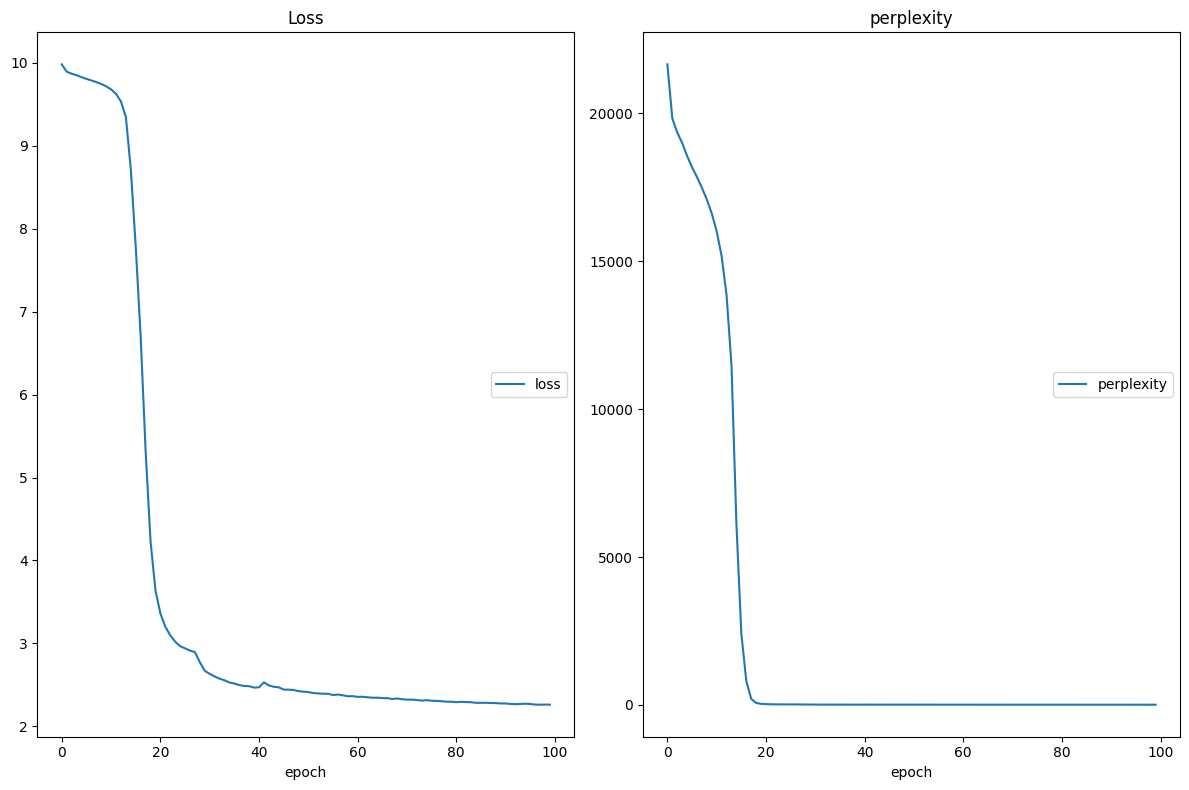

Loss
	loss             	 (min:    2.261, max:    9.983, cur:    2.261)
perplexity
	perplexity       	 (min:    9.591, max: 21649.107, cur:    9.597)


In [ ]:
# =============================
# TODO: train the model

##train function arguments:
"""
    Args:
        model:
        dataloader:
        criterion:
        optimizer:
        device:
        num_epochs:

    Return: final perplexity value after training
"""

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()
epochs=100
final_perp=train(model,train_dataloader,criterion,optimizer,device,epochs)

In [ ]:
print(f"final train perplexity: {final_perp}")

final train perplexity: 9.597135946332227


## 2.2  Evaluate Perplexity on the Validation Set (2 pts)
**TODO**
- Report the perplexity of the RNN on the validation set

In [ ]:
# =============================
# TODO: Report the perplexity on the Validation Set
def evaluate(model: nn.Module,
             dataloader: torch.utils.data.DataLoader,
             criterion: nn.modules.loss,
             device: torch.device) -> float:
    """
    Args:
        model: The rnn model
        dataloader: DataLoader containing validation data
        criterion: Loss criterion (e.g., nn.CrossEntropyLoss)
        device: Device to perform evaluation (e.g., 'cuda' or 'cpu')

    Returns:
        final_perp: Perplexity on the validation set
    """
    model.eval()  # Set the model to evaluation mode
    model.to(device)  # Move model to appropriate device

    total_loss = 0

    with torch.no_grad():  # Disable gradient calculation during inference
        for batch in dataloader:
            x, y = batch[:, :-1].to(device), batch[:, 1:].to(device)
            out_prob,_ = model(x)
            out_prob = out_prob.view(-1, out_prob.size(-1))
            loss = criterion(out_prob, y.flatten())
            total_loss += loss.item()

    average_loss = total_loss / len(dataloader)
    final_perp = math.exp(average_loss)
    return final_perp

validation_perp=evaluate(model,valid_dataloader,criterion,device)
print("perplexity on validation set: ",validation_perp)


perplexity on validation set:  9.60607825169364


## Generating Sequences With the RNN (Extra: 1 pt)

Temperature scaling allows us to adjust the level of stochasticity associated with the model predictions. We can introduce a temperature parameter to the softmax probability of a given token, via:

$$ P(y_i) = \frac{e^{z_i / T}}{\sum_j e^{z_j / T}}$$

Where:
 - $P(y_{i})$ is the probability of class i.
 - $z_{i}$ is the probability of class i.
 - T is the temperature parameter

**TODO**

 - For temperature values in the range 1..10 (inclusive), seed the language model with a '\<bos\>' token and produce a sequence until the appropriate stopping condition occurs.

- Plot the Temperature Value vs the Length of the Sequence Produced

In [ ]:
def generate(model: nn.Module,
            temperature:int) -> str:
    """
        Args:
            model:
            temperature: scale the logits
    """
    sequence = []
    seq_length=0
    max_length=50
    sequence.append('<bos>')
    model.eval()  # Set model to evaluation mode
    model.to(device)  # Move model to device
    print("sequence: ",sequence)
    with torch.no_grad():
      while True:
        input_text = ' '.join(sequence)  # Convert list to string
        input_sequence = tokenizer.encode(input_text).ids  # Get ids from tokenizer
        input_sequence = torch.tensor(input_sequence).unsqueeze(0).to(device)

        #input_sequence = torch.tensor(tokenizer.encode(sequence).tokens).unsqueeze(0).to(device)
        #print("hello: ",input_sequence)
        prob,logits = model(input_sequence)
        scaled_logits = logits[0, -1, :] / temperature
        probabilities = F.softmax(scaled_logits, dim=0).cpu().numpy()
        next_token_index = np.random.choice(len(probabilities), p=probabilities)
        next_token = tokenizer.decode([next_token_index])
        sequence.append(next_token)

        if next_token == '<eos>' or len(sequence) >= max_length:  # Stopping condition
          if next_token != '<eos>':
            sequence.append('<eos>')
          break




    # =============================
    # TODO: Define the temperature-scaled
    #       generation function
    return ' '.join(sequence)

In [ ]:
# =============================
# TODO: Generate sequences of varying temperature (T) values
seq_length=[]
for temp in range(1,11):
  generated_seq=generate(model,temp)
  print(f"temperature: {temp}")
  print(f"generated text: {generated_seq}")
  print(f"length of sequence: {len(generated_seq)}")
  seq_length.append(len(generated_seq))

sequence:  ['<bos>']
temperature: 1
generated text: <bos> tour by been hal banaras            jan  thus        beach          measures      strongly       <eos>
length of sequence: 108
sequence:  ['<bos>']
temperature: 2
generated text: <bos> mansfield centimeter tables muzzle getting zagreb oncostylis other palate early scapteriscus cases promised plagiarism compositions provided stopped gentler niobium survive  remastered gripping volcano crocodile ruin lunar chuck elaborate    painted    mcgregor         easter    <eos>
length of sequence: 291
sequence:  ['<bos>']
temperature: 3
generated text: <bos> harwich croydon crevices meadow annulment casterman rosemary rowing rehearsal moraines herman conversing masand army ethnicity anonymous tearing kingdom dropkicks derives haven corncrake brannock resolving sedgemoor windows prom riding geddes militaries imca  encouragement deformed   your  hollow  carriers     tribe    <eos>
length of sequence: 332
sequence:  ['<bos>']
temperature: 4
ge

#  Plot Temperature (T) vs Sequence Length (L) : what do you notice and why?

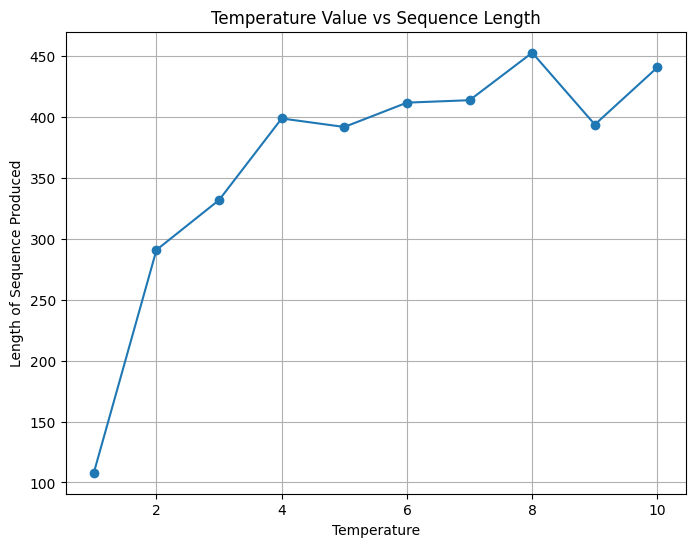

In [ ]:
# =============================
# TODO: Plot T vs L
import matplotlib.pyplot as plt
temperature_range=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(8, 6))
plt.plot(list(temperature_range), seq_length, marker='o')
plt.xlabel('Temperature')
plt.ylabel('Length of Sequence Produced')
plt.title('Temperature Value vs Sequence Length')
plt.grid(True)
plt.show()

Here we can see that with the increase of temperature, the sequence length of the generated text increases. This is because higher temperature means increased stochasticity and it causes more diversity in token selection.  Since the model is more likely to explore various possibilities during generation. Evenntually creating longer sequences.